<a href="https://colab.research.google.com/github/sameerjha462000/DS/blob/main/15%2C18_April(MNIST).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# __This is a Classification problem.__

RGB color space or RGB color system, constructs all the colors from the combination of the Red, Green and Blue colors.

The red, green and blue use 8 bits each, which have integer values from 0 to 255. This makes 256 X 256 X 256=16777216 possible colors.

RGB ≡ Red, Green, Blue

In __MNIST__ dataset, Each image is 28 X 28 pixels image. For convinence, it is stored in a 1D array of 28 X 28 = 784 size.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from sklearn.datasets import fetch_openml

df=fetch_openml("mnist_784",version=1,as_frame=True)

In [3]:
df

{'DESCR': "**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  \n**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  \n**Please cite**:  \n\nThe MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  \n\nIt is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered i

In [4]:
# df is a complicated data structure 
type(df)

sklearn.utils.Bunch

In [5]:
df.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [6]:
print(df.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [7]:
print(type(df.target))
df.target

<class 'pandas.core.series.Series'>


0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [8]:
print(type(df.data))
df.data

<class 'pandas.core.frame.DataFrame'>


,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
df.data.values

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [10]:
X = df.data.values
Y = df.target

In [11]:
print(X.shape)
print(Y.shape)

(70000, 784)
(70000,)


But one thing to notice here is that Y contains str values and when we give our data for training to model, then we must give in numerical values.

In [12]:
type(Y[0])


str

So we convert the values in Y(which is a series) into 'int8'

In [13]:
Y = Y.astype('int8')

In [14]:
# Now let us check the datatype of values in Y
type(Y[0])

numpy.int8

Let us see the data in X

In [15]:
X[0]
# it consists of 784 values as the image was stored in the form of a 28 * 28 px 2D array and then reshaped into a 1D array

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

TypeError: ignored

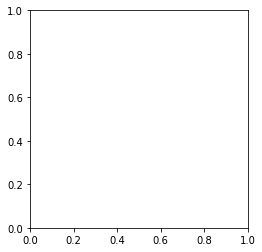

In [16]:
plt.imshow(X[0])

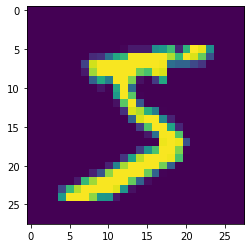

Target 5


In [17]:
plt.imshow(X[0].reshape(28,28))
plt.show()

print("Target",Y[0])

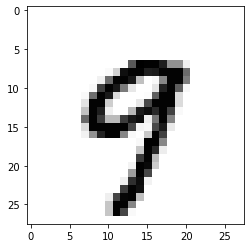

Target 9


In [18]:
# we generalised the above code.
idx = 45 # give it any value from 0 to 70000
plt.imshow(X[idx].reshape(28,28),cmap = 'Greys')
plt.show()

print("Target",Y[idx])

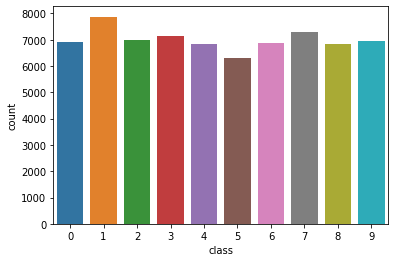

In [19]:
sns.countplot(x = Y)
plt.show()

This is a classification problem. Y here has 10 values.<br>
Classification is of two types:
- __Binary Classification__
- __Multiple Classification__

Binary Classifier takes only two values.<br>

Here we will be making 5 classifier. That means either the value is 5 or not false and our model should be able to predict whether the values given to it represent 5 or not.<br><br>

Actually Multiple Classifier is made on top of Binary Classifier.So we will first learn Binary Classifier.

In [20]:
y = Y == 5

In [21]:
print(type(y))
print(y.shape)
y
# jha jha bhi 5 he wha true aa jayega

<class 'pandas.core.series.Series'>
(70000,)


0         True
1        False
2        False
3        False
4        False
         ...  
69995    False
69996    False
69997    False
69998     True
69999    False
Name: class, Length: 70000, dtype: bool

Now we will train the data using X and y. So let us divide the data into training and testing parts.

In [22]:
X_train,X_test,y_train,y_test = X[:60000],X[60000:],y[:60000],y[60000:]

## Now we select a classifier and train that using this data. So we use Stochastic Gradient Descent Classifier

In [23]:
from sklearn.linear_model import SGDClassifier

# Now let us create an object of SGDClassifier
sgdc = SGDClassifier()

In [24]:
sgdc.fit(X_train,y_train)

SGDClassifier()

### Now our model has got trained, So let us check it.

In [25]:
sgdc.predict([X[1]])

array([False])

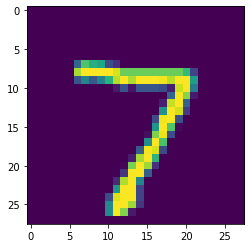

In [26]:
img = X_test[0]
plt.imshow(img.reshape(28,28))
plt.show()

In [27]:
# and now let us see what our model has to say for this
print("Predicted",sgdc.predict([img]))

Predicted [False]


We see that our model has predicted False which means it is saying that the given image is not 5 which is true.

## Now let us count how many times our model was right.

In [28]:
y_pred = sgdc.predict(X_test)

In [29]:
score = y_pred==y_test

__score will give True whenever the output of both of them matches, i.e, whenever the model was right.__

In [30]:
score

60000    True
60001    True
60002    True
60003    True
60004    True
         ... 
69995    True
69996    True
69997    True
69998    True
69999    True
Name: class, Length: 10000, dtype: bool

In [39]:
total_right_pred = score.sum()
# This is the number of times our model is right and the total number of data points in our testing dataset is 10000
# So our model id 95.53% accurate.
total_right_pred

9553

In [41]:
(total_right_pred*100)/y_test.shape[0]

95.53

__this could also be done using sklearn modules.__

In [42]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.9553

# Confusion matrix

In [43]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[8771,  337],
       [ 110,  782]])

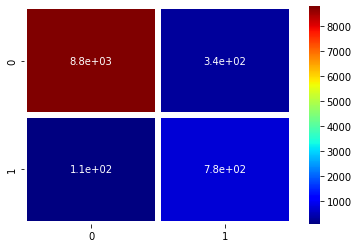

In [48]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,lw=5,cmap='jet')
plt.show()

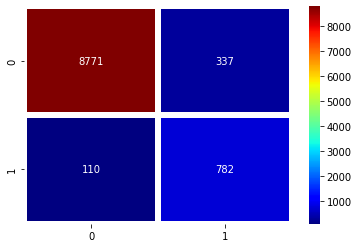

In [49]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,lw=5,cmap='',fmt='d')
plt.show()

<font color='black'>On The __Y axis__ we have __y_test__ and on the __X axis__ we have __y_pred__. __0__ indicates that a given parameter is __False__ and __1__ indicates that a given parameter is __True__.</font>

So from the above matrix it is seen that
- __#__ of times when __y_pred__ is 0(false) and __y_test__ is also 0(false) is __8771__.(__True Negative__)
- __#__ of times when __y_pred__ is 1(True) and __y_test__ is also 1(True) is __782__.(__True Positive__)
- __#__ of times when __y_pred__ is 0(false) and __y_test__ is 1(True) is __110__.(__False Negative__)
- __#__ of times when __y_pred__ is 1(True) and __y_test__ is 0(False) is __337__.(__False Positive__)


We say __True__ when the predicted and actual output is same and __False__ when they are not.<br>
We say __Negative__ and __Positive__ on the basis of predicted output.

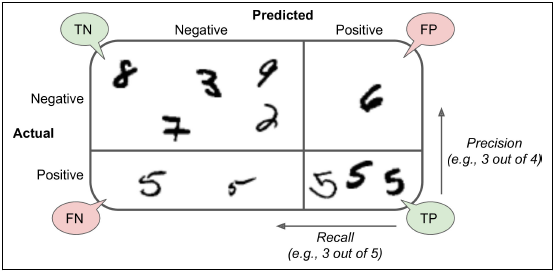
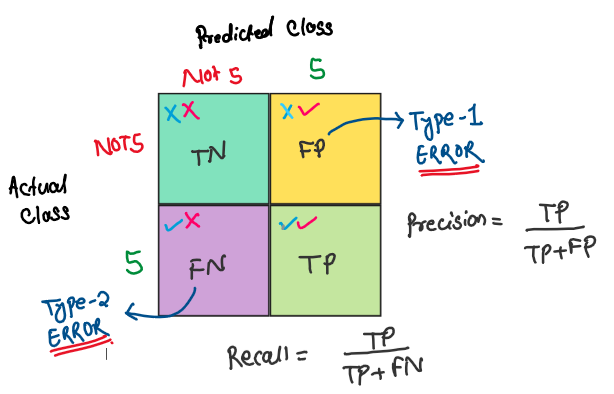

A perfect classifier would have only true positives and true negatives, so its confusion matrix would have nonzero values only on its main diagonal (top left to bottom right)


For finding __TP__,__FP__,__TN__,__FN__ always first see predicted result. If that is negative then we use __N__ and if that is positive it is __P__. After that check whether it matches with the actual result or not, if yes then __T__ and if not then __F__.

# __PRECISION__

Precision is known as the accuracy of the positive predictions.
- 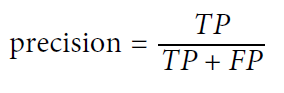

In [51]:
from sklearn.metrics import precision_score
precision_score(y_test,y_pred)

0.6988382484361036

This means that out of 100 times when our model says that the image is 5, only 69 are actually 5.

In [53]:
782/(337+782)

0.6988382484361036

# __RECALL__

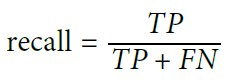

In [54]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred)

0.8766816143497758

This means that if our dataset had 100 5's then our model would be able to catch only 87 of them correctly.

# __F1 - Score__
- It is often convenient to combine precision and recall into a single metric called the F1 score, in particular if you need a simple way to compare two classifiers.
- The F1 score is the harmonic mean of precision and recall.<br>
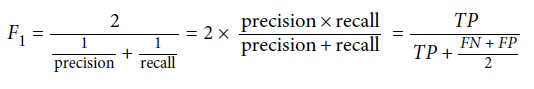


In [55]:
from sklearn.metrics import f1_score
f1_score(y_test,y_pred)

0.7777225261064147

In [56]:
# Now let us verify this
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1_score_calculated = (2 * precision * recall)/(precision + recall)


0.7777225261064147

In [57]:
print("F1_Score from sklearn_metrics :",f1_score(y_test,y_pred))
print("F1_Score by calculation :",f1_score_calculated)

F1_Score from sklearn_metrics : 0.7777225261064147
F1_Score by calculation : 0.7777225261064147


# __But what is the criteria to judge a model?__

Well, the answer to this question depends on the situation.<br>
- In many cases we require high precision and in other cases we require high recall.
- Also, note that __Recall__ and __Precision__ are inversely proportional.
  - That is if __Recall__ increases then __Precision__ decreases and vice-versa.